In [95]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import OCRDataSet

In [96]:
label_map = {1: "0", 2: "1", 3: "2", 4: "3", 5: "4",
                6: "5", 7: "6", 8: "7", 9: "8", 10: "9",
                11: "A", 12: "B", 13: "C", 14: "D", 15: "E",
                16: "F", 17: "G", 18: "H", 19: "I", 20: "J",
                21: "K", 22: "L", 23: "M", 24: "N", 25: "O",
                26: "P", 27: "Q", 28: "R", 29: "S", 30: "T",
                31: "U", 32: "V", 33: "W", 34: "X", 35: "Y",
                36: "Z", 37: "a", 38: "b", 39: "c", 40: "d",
                41: "e", 42: "f", 43: "g", 44: "h", 45: "i",
                46: "j", 47: "k", 48: "l", 49: "m", 50: "n",
                51: "o", 52: "p", 53: "q", 54: "r", 55: "s",
                56: "t", 57: "u", 58: "v", 59: "w", 60: "x",
                61: "y", 62: "z"}

In [108]:
epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

adadelta_train_acc = [.37366, .58872, .66018, .70332, .73431, .75636, .77351, .78753, .79858, .80972,
                          .82031, .82678, .83419, .84170, .84539]
adadelta_test_acc =  [.55880, .65930, .70057, .72292, .74870, .77473, .78714, .79961, .79769, .79618,
                      .84185, .84444, .84311,  .83974, .83974]

sgd_train_acc = [.516, .731, .763, .777, .787, .793]
sgd_train_acc = [.708, .739, .751, .794, .793, 0.790]

adam_train_acc = []
adam_test_acc = []

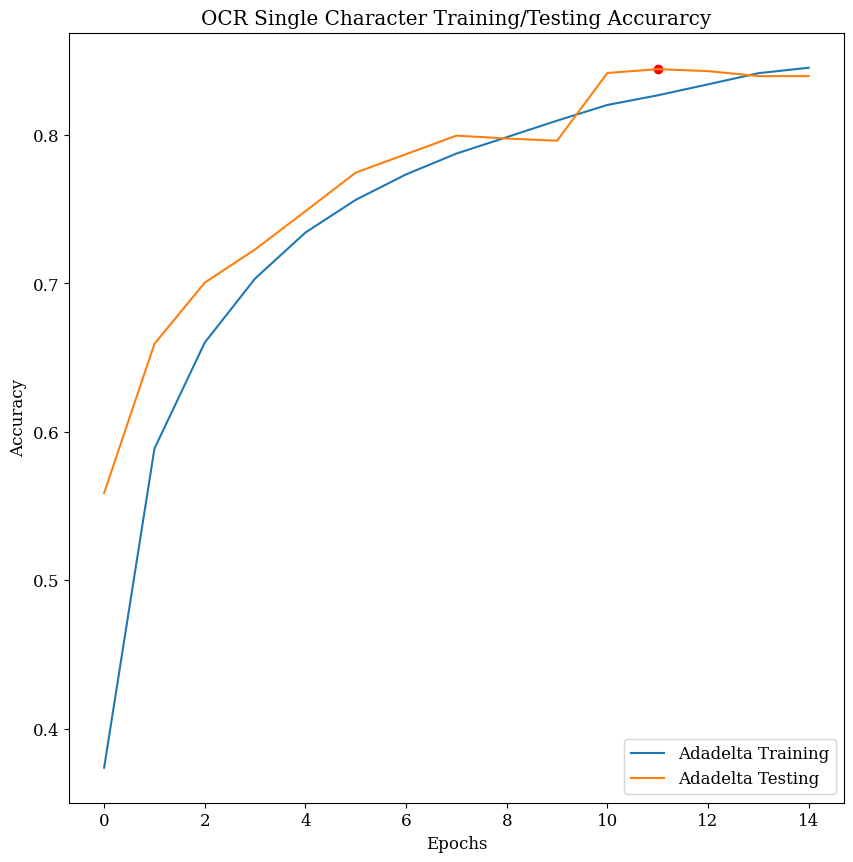

In [129]:
plt.plot(epochs, adadelta_train_acc, label='Adadelta Training')
plt.plot(epochs, adadelta_test_acc, label='Adadelta Testing')
plt.scatter(11, max(adadelta_test_acc), color='red')
plt.title("OCR Single Character Training/Testing Accurarcy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['font.size']=12
plt.rcParams["font.family"] = "serif"
plt.legend(loc='lower right')
plt.show()

In [97]:
# Let’s visualize a few training images so as to understand the data augmentations.
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

def collate_fn(batch):
    # Filter failed images first
    batch = list(filter(lambda x: x is not None, batch))
    # Now collate into mini-batches
    images = torch.stack([b[0] for b in batch])
    labels = torch.LongTensor([b[1] for b in batch])
    
    return images, labels

In [98]:
single_path = "data/single/Img"
# image_datasets = datasets.ImageFolder(single_path, data_transforms)
character_dataset = OCRDataSet(single_path, data_transforms, label_map)
data_loaders = torch.utils.data.DataLoader(character_dataset, batch_size=4,shuffle=True, num_workers=0, collate_fn=collate_fn)

torch.Size([4, 3, 128, 128])
tensor([36, 41, 49,  6])
torch.Size([3, 132, 522])


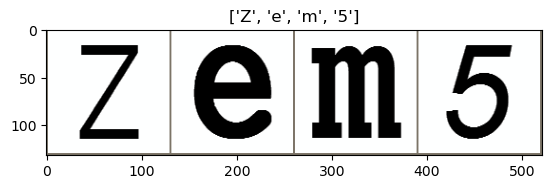

In [99]:
# Get a batch of training data
inputs, classes = next(iter(data_loaders))
print(inputs.shape)
print(classes)

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
print(out.shape)

imshow(out, title=[label_map[int(x)] for x in classes])

1.13.1


In [112]:
img_name = "data/multiple/jpg/6_6.jpg"
print(pytesseract.image_to_boxes(img_name))

P 2 10 20 33 0
- 21 17 30 20 0
S 33 10 49 33 0
e 51 10 64 26 0
g 66 3 81 26 0
m 83 10 108 26 0
e 110 10 123 26 0
n 125 10 141 26 0
t 143 10 153 30 0



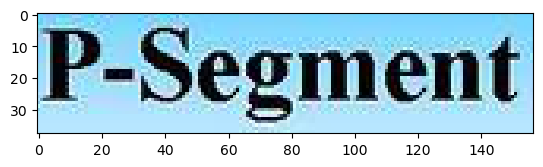

In [134]:
img = Image.open(img_name)
wImg, hImg = img.size
imgplot = plt.imshow(img)
plt.show()

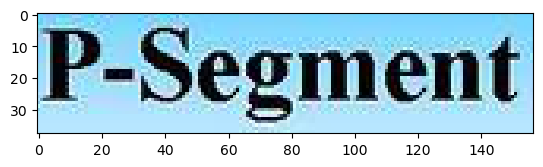

(18, 23)
(16, 23)
(13, 16)
(15, 23)
(25, 16)
(13, 16)
(16, 16)
(10, 20)
P


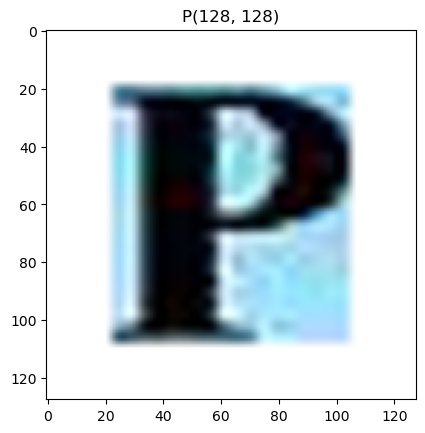

S


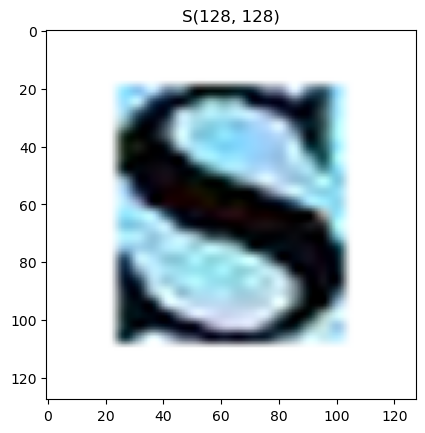

e


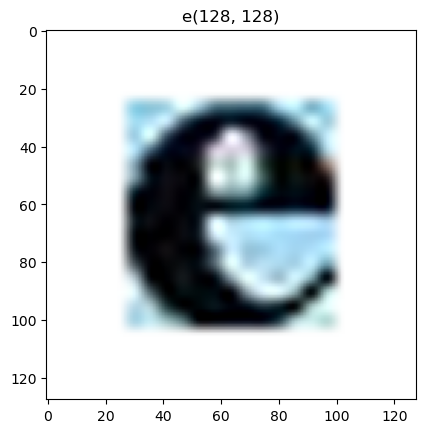

g


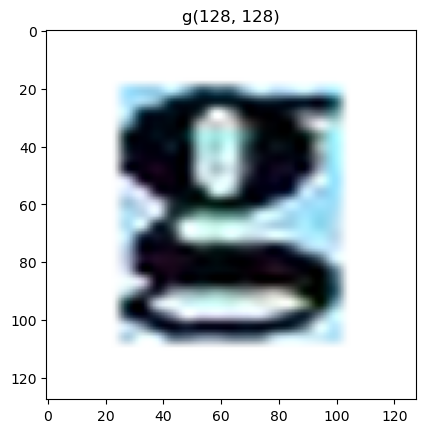

m


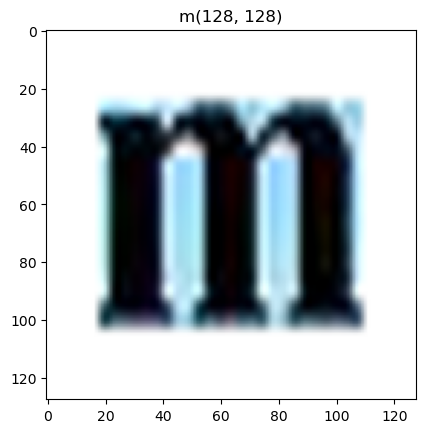

e


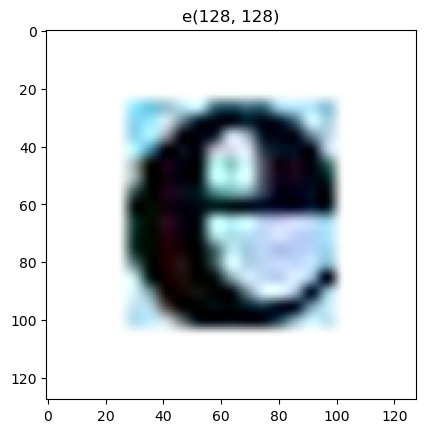

n


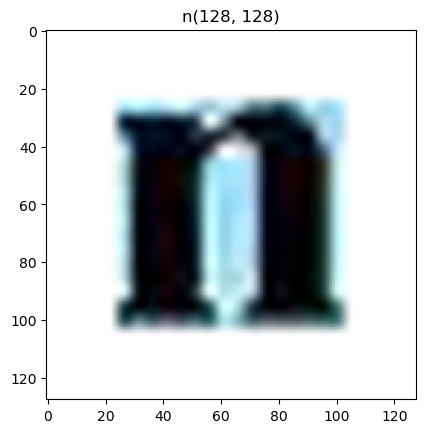

t


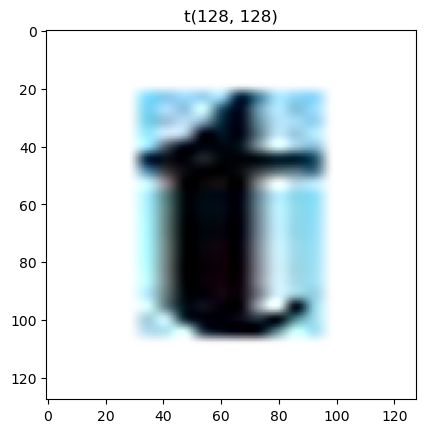

In [151]:
img = Image.open(img_name)
wImg, hImg = img.size
imgplot = plt.imshow(img)
plt.show()

def extract_chars(image, out_shape):
    wImg, hImg = image.size
    labels, imgs = [], []
    
    img = Image.open(img_name)
    boxes = pytesseract.image_to_boxes(img)
    if len(boxes) == 0:
        return
    
    for box in boxes.splitlines():
        vals = box.split(' ')
        if vals[0] not in label_map.values():
            continue
        labels.append(vals[0])
        x, y, w, h = int(vals[1]), int(vals[2]), int(vals[3]), int(vals[4])
        cropped = img.crop((x, hImg-h, w, hImg-y))
        w2, h2 = cropped.size
        padded = Image.new(cropped.mode, (w2+10, h2+10), (255, 255, 255))
        padded.paste(cropped, (5,5))
        char_img = padded.resize((out_shape,out_shape))
        imgs.append(char_img)
    return labels, imgs

labels, imgs = extract_chars(img, 128)
for label,img in zip(labels,imgs):
    imgplot = plt.imshow(img)
    plt.title(label + str(img.size))
    plt.show()

Citations:

@InProceedings{Gupta16,
  author       = "Ankush Gupta and Andrea Vedaldi and Andrew Zisserman",
  title        = "Synthetic Data for Text Localisation in Natural Images",
  booktitle    = "IEEE Conference on Computer Vision and Pattern Recognition",
  year         = "2016",
}

http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/


https://arxiv.org/abs/1512.03385

https://github.com/kuangliu/pytorch-cifar